In [4]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
comp_fail = pd.read_csv("train_data.csv",index_col=0)

In [5]:
print(comp_fail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, jobID1634295 to jobID1165709
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   memory_GB            20000 non-null  float64
 1   network_log10_MBps   20000 non-null  float64
 2   local_IO_log10_MBps  20000 non-null  float64
 3   NFS_IO_log10_MBps    20000 non-null  float64
 4   failed               20000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 937.5+ KB
None


In [ ]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

In [86]:
comp_fail.columns

Index(['memory_GB', 'network_log10_MBps', 'local_IO_log10_MBps',
       'NFS_IO_log10_MBps', 'failed'],
      dtype='object')

In [93]:
cat_cols = [col for col in comp_fail.columns if comp_fail[col].dtypes == 'O']

for col in comp_fail:
    print(comp_fail[col].value_counts(), "\n\n")

4.9981     5
5.0095     4
5.0535     4
9.8129     4
7.4236     4
          ..
25.8651    1
16.4559    1
29.0406    1
29.7149    1
21.4721    1
Name: memory_GB, Length: 18620, dtype: int64 


 2.8821    29
 3.2080    25
 3.2343    13
 2.8823    12
 3.2345    12
           ..
 3.1117     1
 1.9422     1
 0.5732     1
 1.1902     1
-1.4519     1
Name: network_log10_MBps, Length: 16402, dtype: int64 


-0.7196    6
-0.6231    6
-0.6070    6
 0.1870    6
-0.6857    6
          ..
 0.9775    1
 0.2174    1
-0.9128    1
-0.3553    1
-0.4670    1
Name: local_IO_log10_MBps, Length: 13774, dtype: int64 


-3.0000    10101
-2.9175       74
-2.9210       52
-2.9138       50
-2.9097       46
           ...  
 0.0284        1
 1.6651        1
-0.6852        1
 0.4415        1
-0.4670        1
Name: NFS_IO_log10_MBps, Length: 8114, dtype: int64 


0    18374
1     1626
Name: failed, dtype: int64 




In [96]:
comp_fail.isna().sum()

memory_GB              0
network_log10_MBps     0
local_IO_log10_MBps    0
NFS_IO_log10_MBps      0
failed                 0
dtype: int64

In [26]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = ["Working"],
            y = comp_fail[comp_fail["failed"]== 0]["failed"].value_counts().values,
            name='Working'
    )

trace1 = go.Bar(
            x = ["Failed"],
            y = comp_fail[comp_fail["failed"]== 1]["failed"].value_counts().values,
            name='Failed'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Failure Variable'
    ),
    title='Failure Distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [57]:
#Percentage of Failure
non_fail_count =int(comp_fail[comp_fail["failed"]== 0]["failed"].value_counts())
fail_count = int(comp_fail[comp_fail["failed"]== 1]["failed"].value_counts())
print((fail_count/(non_fail_count+fail_count)*100),"%")
print((non_fail_count/(non_fail_count+fail_count)*100),"%")

8.129999999999999 %
91.86999999999999 %


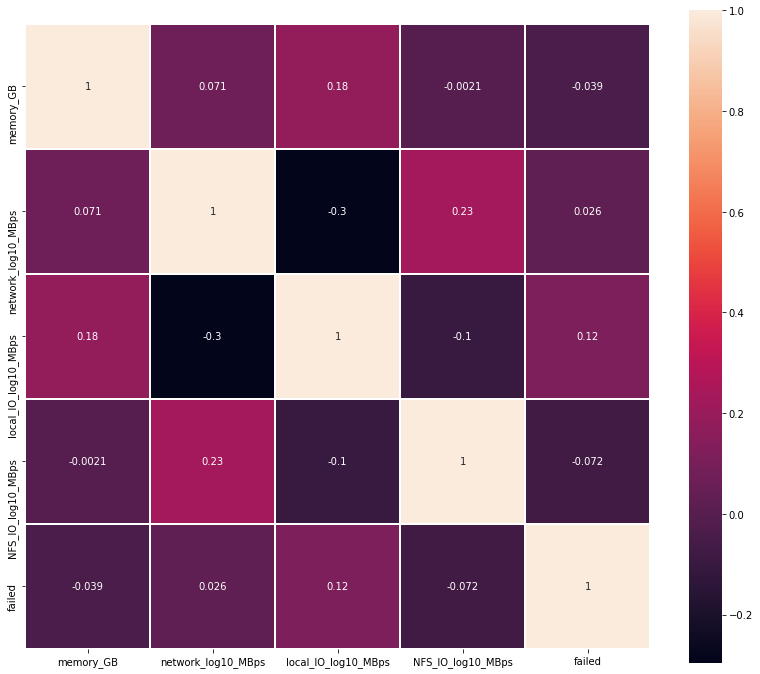

In [58]:
plt.figure(figsize=(14,12))
sns.heatmap(comp_fail.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [160]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler

In [175]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
#X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [171]:
X

array([[ 44.3904,  -1.0262,   0.8033,  -3.    ],
       [ 31.5839,  -1.4608,  -0.608 ,  -2.9967],
       [154.461 ,  -0.5508,  -0.3637,  -3.    ],
       ...,
       [ 22.1773,   3.5185,  -0.4147,  -3.    ],
       [ 14.8184,   2.7831,  -1.032 ,   0.8747],
       [  7.9835,   0.7225,  -1.1583,   0.2308]])

In [156]:
num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)
preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)
preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

In [157]:
lr_clf = make_pipeline_with_sampler(
    preprocessor_linear,
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000),
)
rf_clf = make_pipeline_with_sampler(
    preprocessor_tree,
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)

LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.705735 (0.021864)
CART: 0.703091 (0.021797)
NB: 0.500000 (0.000000)
RF: 0.687786 (0.020260)
RFB: 0.797995 (0.015892)
BBC: 0.786020 (0.023110)
SVM: 0.652310 (0.018634)
XGB: 0.673282 (0.020775)
RFBW: 0.686886 (0.020242)
LRBW: 0.653284 (0.017133)
RUS: 0.718879 (0.021600)
RUS: 0.718810 (0.024298)


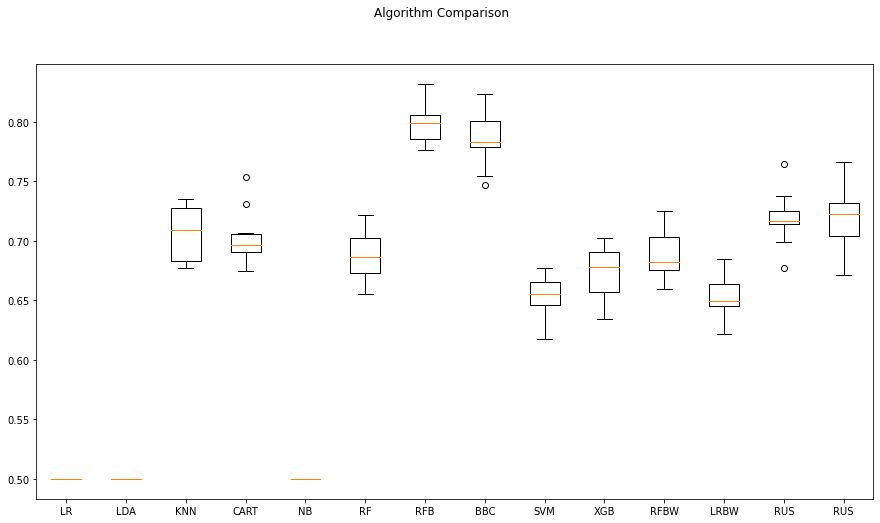

In [176]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [173]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.691979 (0.013106)
CART: 0.704688 (0.028077)
NB: 0.500000 (0.000000)
RF: 0.688351 (0.019333)
RFB: 0.800456 (0.014940)
BBC: 0.795562 (0.014127)
SVM: 0.499963 (0.000110)
XGB: 0.673282 (0.020775)
RFBW: 0.687339 (0.019018)
LRBW: 0.653284 (0.017039)
RUS: 0.715539 (0.020457)
RUS: 0.718896 (0.020524)


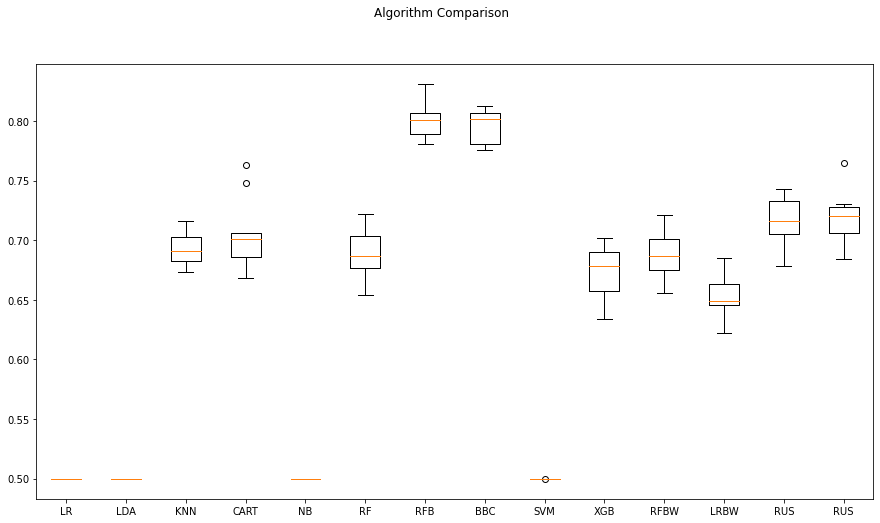

In [174]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [107]:
cv_results = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold,scoring="balanced_accuracy")

[array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.72914713, 0.70988742, 0.72158411, 0.68634317, 0.67714767,
        0.67865327, 0.70818733, 0.73550725, 0.68152723, 0.72936745]),
 array([0.68612856, 0.70526768, 0.67835609, 0.69935644, 0.69477821,
        0.6834092 , 0.7496431 , 0.74275362, 0.69037058, 0.71024957]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.7108027 , 0.68901354, 0.67311142, 0.67171281, 0.68554183,
        0.672469  , 0.71433339, 0.7259058 , 0.65825379, 0.68406844]),
 array([0.82048246, 0.77904973, 0.82169374, 0.76304058, 0.78439079,
        0.79053524, 0.82980144, 0.78586957, 0.80381808, 0.7999843 ]),
 array([0.80054389, 0.76292385, 0.80953508, 0.75939118, 0.7865525 ,
        0.78832208, 0.80839683, 0.79166667, 0.79514318, 0.81767383]),
 array([0.

In [99]:
logisticb = LogisticRegression()
logisticb.fit(X_train,y_train)

logisticb.score(X_train,y_train)

0.9178666666666667

In [ ]:
logisticb.